In [1]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('final_reviews.csv')
df.head()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,processed_text,unlemm_processed_text
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,i bought vitality canned dog food product good...,i bought vitality canned dog food products goo...
1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanut th...,product arrived labeled jumbo salted peanuts ...
2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,this confection century it light pillowy citru...,this confection centuries it light pillowy c...
3,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,if looking secret ingredient robitussin i beli...,if looking secret ingredient robitussin i beli...
4,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy great price there wide assortment ...,great taffy great price there wide assortment...


In [ ]:
df.columns.values

array(['Unnamed: 0', 'Id', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'Summary', 'Text', 'processed_text', 'unlemm_processed_text'],
      dtype=object)

## 1. Small Dataset - 10000 Samples

In [ ]:
df2 = pd.DataFrame(df.iloc[:10000,:], columns = df.columns.values)

In [ ]:
df2.to_csv("final_reviews_10000.csv")

In [ ]:
df2['processed_text'].head()

0    i bought vitality canned dog food product good...
1    product arrived labeled jumbo salted peanut th...
2    this confection century it light pillowy citru...
3    if looking secret ingredient robitussin i beli...
4    great taffy great price there wide assortment ...
Name: processed_text, dtype: object

In [ ]:
df3 = df2[['Id', 'ProductId', 'Summary', 'processed_text', 'unlemm_processed_text']]

In [ ]:
df3.head()

,Id,ProductId,Summary,processed_text,unlemm_processed_text
0,1,B001E4KFG0,Good Quality Dog Food,i bought vitality canned dog food product good...,i bought vitality canned dog food products goo...
1,2,B00813GRG4,Not as Advertised,product arrived labeled jumbo salted peanut th...,product arrived labeled jumbo salted peanuts ...
2,3,B000LQOCH0,"""Delight"" says it all",this confection century it light pillowy citru...,this confection centuries it light pillowy c...
3,4,B000UA0QIQ,Cough Medicine,if looking secret ingredient robitussin i beli...,if looking secret ingredient robitussin i beli...
4,5,B006K2ZZ7K,Great taffy,great taffy great price there wide assortment ...,great taffy great price there wide assortment...


In [ ]:
df3.iloc[0,4]

'i bought vitality canned dog food products good quality  the product looks like stew processed meat smells better  my labrador finicky appreciates product better most '

In [ ]:
df3.iloc[0,3]

'i bought vitality canned dog food product good quality the product look like stew processed meat smell better my labrador finicky appreciates product better most'

#2. Data Exploration + Preprocessing

In [ ]:
df3['word_count'] = df3['unlemm_processed_text'].apply(lambda x: len(str(x).split(" ")))
df3[['unlemm_processed_text','word_count']].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,unlemm_processed_text,word_count
0,i bought vitality canned dog food products goo...,28
1,product arrived labeled jumbo salted peanuts ...,26
2,this confection centuries it light pillowy c...,69
3,if looking secret ingredient robitussin i beli...,28
4,great taffy great price there wide assortment...,20


In [ ]:
import re
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
preprocess = []
for i in range(df3.shape[0]):
    text = re.sub('[^a-zA-Z]', ' ', df3.iloc[i,4])
        
    #Convert to lowercase
    text = text.lower()

    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)

    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)

    ##Convert to list from string
    text = text.split()

    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    preprocess.append(text)

In [ ]:
df3['Final_Preprocess'] = preprocess
df3.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Id,ProductId,Summary,processed_text,unlemm_processed_text,word_count,Final_Preprocess
0,1,B001E4KFG0,Good Quality Dog Food,i bought vitality canned dog food product good...,i bought vitality canned dog food products goo...,28,bought vitality canned dog food product good q...
1,2,B00813GRG4,Not as Advertised,product arrived labeled jumbo salted peanut th...,product arrived labeled jumbo salted peanuts ...,26,product arrived labeled jumbo salted peanut pe...
2,3,B000LQOCH0,"""Delight"" says it all",this confection century it light pillowy citru...,this confection centuries it light pillowy c...,69,confection century light pillowy citrus gelati...
3,4,B000UA0QIQ,Cough Medicine,if looking secret ingredient robitussin i beli...,if looking secret ingredient robitussin i beli...,28,looking secret ingredient robitussin believe g...
4,5,B006K2ZZ7K,Great taffy,great taffy great price there wide assortment ...,great taffy great price there wide assortment...,20,great taffy great price wide assortment yummy ...


#3. WordCloud 

In [ ]:
!pip install wordcloud

(-0.5, 499.5, 499.5, -0.5)

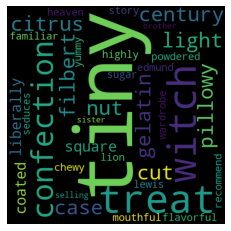

In [ ]:
#from wordcloud import WordCloud, STOPWORDS
#import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 500, height = 500, stopwords = STOPWORDS).generate(preprocess[2])
#plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis("off")

#4. Bag of Words Model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer



In [ ]:
cv = CountVectorizer(max_df=0.8, stop_words=stop_words, max_features=10000, ngram_range=(1, 3))
X = cv.fit_transform(preprocess)

In [ ]:
list(cv.vocabulary_.keys())[:10]

['bought',
 'canned',
 'dog',
 'food',
 'product',
 'good',
 'quality',
 'look',
 'like',
 'stew']

[Text(0, 0, 'br'),
 Text(0, 0, 'like'),
 Text(0, 0, 'coffee'),
 Text(0, 0, 'taste'),
 Text(0, 0, 'flavor'),
 Text(0, 0, 'good'),
 Text(0, 0, 'product'),
 Text(0, 0, 'great'),
 Text(0, 0, 'love'),
 Text(0, 0, 'cup'),
 Text(0, 0, 'food'),
 Text(0, 0, 'tea'),
 Text(0, 0, 'amazon'),
 Text(0, 0, 'time'),
 Text(0, 0, 'use'),
 Text(0, 0, 'best'),
 Text(0, 0, 'little'),
 Text(0, 0, 'tried'),
 Text(0, 0, 'chip'),
 Text(0, 0, 'price')]

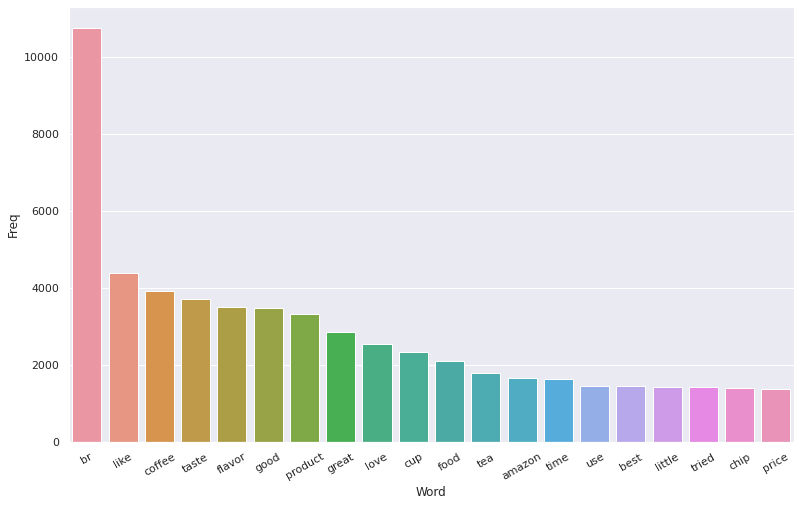

In [ ]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(preprocess, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

#5. Tf-Idf Vectorisation

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [ ]:
tf_idf_vector=tfidf_transformer.transform(cv.transform([preprocess[2]]))

In [ ]:
feature_names=cv.get_feature_names()

In [ ]:
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(preprocess[2])
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
confection century light pillowy citrus gelatin nut case filbert cut tiny square liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story c lewis lion witch wardrobe treat seduces edmund selling brother sister witch

Keywords:
tiny 0.332
treat 0.247
confection 0.242
powdered sugar 0.238
gelatin 0.235


In [ ]:
Keywords = []
for i in range(len(preprocess)):
  tf_idf_vector=tfidf_transformer.transform(cv.transform([preprocess[i]]))
  sorted_items=sort_coo(tf_idf_vector.tocoo())
  keywords=extract_topn_from_vector(feature_names,sorted_items,5)
  Keywords.append(keywords)


,Text
0,"{'product look': 0.296, 'product better': 0.27..."
1,"{'jumbo': 0.548, 'peanut': 0.362, 'unsalted': ..."
2,"{'tiny': 0.332, 'treat': 0.247, 'confection': ..."
3,"{'soda flavor': 0.369, 'medicinal': 0.347, 'se..."
4,"{'taffy': 0.773, 'delivery quick': 0.267, 'wid..."


In [ ]:
df_keywords = pd.DataFrame()
df_keywords['Text'] = preprocess
df_keywords['Keywords'] = Keywords
df_keywords.head()

,Text,Keywords
0,bought vitality canned dog food product good q...,"{'product look': 0.296, 'product better': 0.27..."
1,product arrived labeled jumbo salted peanut pe...,"{'jumbo': 0.548, 'peanut': 0.362, 'unsalted': ..."
2,confection century light pillowy citrus gelati...,"{'tiny': 0.332, 'treat': 0.247, 'confection': ..."
3,looking secret ingredient robitussin believe g...,"{'soda flavor': 0.369, 'medicinal': 0.347, 'se..."
4,great taffy great price wide assortment yummy ...,"{'taffy': 0.773, 'delivery quick': 0.267, 'wid..."


In [ ]:
df_keywords.iloc[1,1]

{'error': 0.259,
 'intended': 0.259,
 'jumbo': 0.548,
 'peanut': 0.362,
 'unsalted': 0.261}

#6. TextRank

In [ ]:
from collections import OrderedDict
import numpy as np
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load('en_core_web_sm')

class TextRank4Keyword():
    """Extract keywords from text"""
    
    def __init__(self):
        self.d = 0.85 # damping coefficient, usually is .85
        self.min_diff = 1e-5 # convergence threshold
        self.steps = 10 # iteration steps
        self.node_weight = None # save keywords and its weight

    
    def set_stopwords(self, stopwords):  
        """Set stop words"""
        for word in STOP_WORDS.union(set(stopwords)):
            lexeme = nlp.vocab[word]
            lexeme.is_stop = True
    
    def sentence_segment(self, doc, candidate_pos, lower):
        """Store those words only in cadidate_pos"""
        sentences = []
        for sent in doc.sents:
            selected_words = []
            for token in sent:
                # Store words only with cadidate POS tag
                if token.pos_ in candidate_pos and token.is_stop is False:
                    if lower is True:
                        selected_words.append(token.text.lower())
                    else:
                        selected_words.append(token.text)
            sentences.append(selected_words)
        return sentences
        
    def get_vocab(self, sentences):
        """Get all tokens"""
        vocab = OrderedDict()
        i = 0
        for sentence in sentences:
            for word in sentence:
                if word not in vocab:
                    vocab[word] = i
                    i += 1
        return vocab
    
    def get_token_pairs(self, window_size, sentences):
        """Build token_pairs from windows in sentences"""
        token_pairs = list()
        for sentence in sentences:
            for i, word in enumerate(sentence):
                for j in range(i+1, i+window_size):
                    if j >= len(sentence):
                        break
                    pair = (word, sentence[j])
                    if pair not in token_pairs:
                        token_pairs.append(pair)
        return token_pairs
        
    def symmetrize(self, a):
        return a + a.T - np.diag(a.diagonal())
    
    def get_matrix(self, vocab, token_pairs):
        """Get normalized matrix"""
        # Build matrix
        vocab_size = len(vocab)
        g = np.zeros((vocab_size, vocab_size), dtype='float')
        for word1, word2 in token_pairs:
            i, j = vocab[word1], vocab[word2]
            g[i][j] = 1
            
        # Get Symmeric matrix
        g = self.symmetrize(g)
        
        # Normalize matrix by column
        norm = np.sum(g, axis=0)
        g_norm = np.divide(g, norm, where=norm!=0) # this is ignore the 0 element in norm
        
        return g_norm

    
    def get_keywords(self, number=10):
        """Print top number keywords"""
        ls = []
        node_weight = OrderedDict(sorted(self.node_weight.items(), key=lambda t: t[1], reverse=True))
        for i, (key, value) in enumerate(node_weight.items()):
            ls.append(key + ' - ' + str(value))
            if i > number:
                break
        return ls
        
        
    def analyze(self, text, 
                candidate_pos=['NOUN', 'PROPN'], 
                window_size=4, lower=False, stopwords=list()):
        """Main function to analyze text"""
        
        # Set stop words
        self.set_stopwords(stopwords)
        
        # Pare text by spaCy
        doc = nlp(text)
        
        # Filter sentences
        sentences = self.sentence_segment(doc, candidate_pos, lower) # list of list of words
        
        # Build vocabulary
        vocab = self.get_vocab(sentences)
        
        # Get token_pairs from windows
        token_pairs = self.get_token_pairs(window_size, sentences)
        
        # Get normalized matrix
        g = self.get_matrix(vocab, token_pairs)
        
        # Initionlization for weight(pagerank value)
        pr = np.array([1] * len(vocab))
        
        # Iteration
        previous_pr = 0
        for epoch in range(self.steps):
            pr = (1-self.d) + self.d * np.dot(g, pr)
            if abs(previous_pr - sum(pr))  < self.min_diff:
                break
            else:
                previous_pr = sum(pr)

        # Get weight for each node
        node_weight = dict()
        for word, index in vocab.items():
            node_weight[word] = pr[index]
        
        self.node_weight = node_weight

In [ ]:
kw = []
for i in range(len(preprocess)):
  tr4w = TextRank4Keyword()
  tr4w.analyze(preprocess[i], candidate_pos = ['NOUN'], window_size=4, lower=False)
  kw.append(tr4w.get_keywords(10))
  #tr4w.get_keywords(10)

In [ ]:
df_keywords_tr = pd.DataFrame()
df_keywords_tr['Text'] = preprocess
df_keywords_tr['Keywords'] = kw
df_keywords_tr.head()

,Text,Keywords
0,bought vitality canned dog food product good q...,"[product - 1.7888708333333332, quality - 1.160..."
1,product arrived labeled jumbo salted peanut pe...,"[peanut - 1.0451562500000002, product - 1.0407..."
2,confection century light pillowy citrus gelati...,"[sugar - 1.3187027777777778, light - 1.1386916..."
3,looking secret ingredient robitussin believe g...,"[extract - 1.3187027777777778, addition - 1.13..."
4,great taffy great price wide assortment yummy ...,"[price - 1.0, assortment - 1.0, taffy - 1.0, d..."


In [ ]:
df_keywords_tr.iloc[2,1]

['sugar - 1.3187027777777778',
 'light - 1.1386916666666667',
 'chewy - 1.1386916666666667',
 'seduces - 1.0',
 'brother - 1.0',
 'century - 0.9487166666666667',
 'treat - 0.9487166666666667',
 'confection - 0.7532402777777778',
 'story - 0.7532402777777778']

In [ ]:
df_keywords.iloc[2,1]

{'confection': 0.242,
 'gelatin': 0.235,
 'powdered sugar': 0.238,
 'tiny': 0.332,
 'treat': 0.247}

In [ ]:
df_keywords_tr.iloc[2,0]

'confection century light pillowy citrus gelatin nut case filbert cut tiny square liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story c lewis lion witch wardrobe treat seduces edmund selling brother sister witch'

#7. Unsupervised NER with BERT

In [4]:
from transformers import BertTokenizer, BertForTokenClassification
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForTokenClassification.from_pretrained('bert-base-uncased', return_dict=True)

inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
labels = torch.tensor([1] * inputs["input_ids"].size(1)).unsqueeze(0)  # Batch size 1

outputs = model(**inputs, labels=labels)
loss = outputs.loss
logits = outputs.logits

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

In [7]:
outputs

TokenClassifierOutput([('loss', tensor(0.9066, grad_fn=<NllLossBackward>)),
                       ('logits', tensor([[[ 0.0725,  0.1502],
                                 [-0.2110,  0.0740],
                                 [ 0.1738, -0.6091],
                                 [ 0.4150, -0.5341],
                                 [ 0.0782, -0.3499],
                                 [-0.1235, -0.3765],
                                 [ 0.1398, -0.7450],
                                 [-0.0420,  0.1249]]], grad_fn=<AddBackward0>))])

In [8]:
loss

tensor(0.9066, grad_fn=<NllLossBackward>)

In [9]:
logits

tensor([[[ 0.0725,  0.1502],
         [-0.2110,  0.0740],
         [ 0.1738, -0.6091],
         [ 0.4150, -0.5341],
         [ 0.0782, -0.3499],
         [-0.1235, -0.3765],
         [ 0.1398, -0.7450],
         [-0.0420,  0.1249]]], grad_fn=<AddBackward0>)